<a href="https://colab.research.google.com/github/ddenebb/hipotesis_testing/blob/main/Tasca_M5_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis Testing exercises.
#- Exercise 1

Download the attached dataset of official UEFA data and select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
images_dir = '/content/gdrive/My Drive/Images'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 5/Data/Lligues europees UEFA.csv"
df = pd.read_csv(path,encoding="ISO-8859-1",delimiter=";", header=0)
print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


This dataframe contains information about  ranking UEFA football teams, including their squad name, country, league rank, number of matches played, wins, draws, losses, goals scored, goals against, goal difference, points, points per game, expected goals, expected goals against, expected goal difference, expected goal difference per 90 minutes, last five matches, attendance, top team scorer and goalkeeper.
- Rk: ranking UEFA
- Squad: squad name
- Country: country
- LgRk: league rank
- MP: number of matches played
- W: wins
- D: draws
- L: losses
- GF: goals scored
- GA: goals against
- GD: goal difference
- Pts: points
- Pts/G: points per game
- xG: expected goals
- xGA: expected goals against
- xGD: expected goal difference
- xGD/90: expected goal difference per 90 minutes
- Last 5: last five matches performance (W=win, D=draw, L=loose)
- Attendance: avg attendance, number of people per match
- Top Team Scorer: player name - nember of goals
- Goalkeeper: player name

Select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

The null hypothesis of the test is that the attirbute 'Pts'(Points) comes from a normal distribution. If the p-value is less than the significance level (alpha, commonly 0.05), we reject the null hypothesis and conclude that the data does not come from a normal distribution.
We can perform a test of distribution for the 'Pts' attribute using the shapiro() function from the scipy.stats library. The shapiro() function tests the null hypothesis that the sample came from a normal distribution.

In [10]:
from scipy.stats import shapiro

null_hypothesis = "Points are normally distributed"
alternative_hypothesis = "Points are NOT normally distributed"

# Get the 'Pts' attribute from the dataframe
pts = df['Pts']

# Perform the Shapiro-Wilk test
stat, p = shapiro(pts)
print(stat)
print(p)

# Set alpha
alpha = 0.05

# Compare p_value with alpha
if p < alpha:
    print("Reject the null hypothesis.")
    print(null_hypothesis)
else:
    print("Fail to reject the null hypothesis.")
    print(alternative_hypothesis)

0.9720419645309448
0.03465989604592323
Reject the null hypothesis.
Points are normally distributed


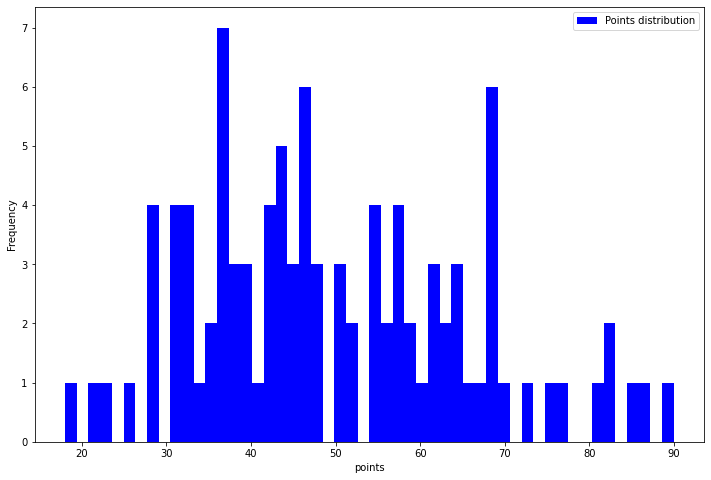

count    98.000000
mean     49.734694
std      16.166371
min      18.000000
25%      37.000000
50%      46.000000
75%      61.750000
max      90.000000
Name: Pts, dtype: float64
[90 86 85 77 83 81 76 69 73 70 64 68 66 67 65 62 58 63 57 61 59 60 55 52
 56 54 51 50 46 48 45 47 42 44 43 38 41 40 39 37 36 33 35 34 32 31 28 29
 26 23 22 18]


In [12]:
plt.figure(figsize=(12,8))
plt.hist(pts, bins=52, color='blue', label='Points distribution')

# add labels and legend
plt.xlabel('points')
plt.ylabel('Frequency')
plt.legend()
#
# show plot
plt.show()

print(pts.describe())
print(pts.unique())


#- Exercise 2

With the same dataset select two other attributes from the dataset. Calculate the p-values ​​and say whether they reject the null hypothesis by taking an alpha of 5%.

Second hypothesis test proposed will be for checking if the team that scores more goals is the one that remains first in the ranking:

We will select the "GF" (goals in favor) column and the "Rk" (ranking) column of the dataset.

Then we define our null hypothesis (H0) and alternative (Ha). In this case, the null hypothesis is that there is a relationship between the goals scored and the ranking position, that is to say, the team that scores more goals will not necessarily be first in the ranking. 

The alternative hypothesis is that there is no relationship between the goals scored and the ranking position, that is to say, the team that scores more goals is more likely to be first in the ranking.

We´ll use a statistical test to compare the relationship between the two variables. An option could be to use a Pearson correlation test, which measures the linear relationship between two continuous variables.

Then calculate the p-value using the selected statistical test to see if it rejects the null hypothesis or not. The p-value must be lower than the selected significance level (alpha) (in this case, 0.05) to reject the null hypothesis.

Finally, we'll interpret the results and conclude whether or not there is a relationship between the goals scored and the ranking.

In [9]:
from scipy import stats

# select columns
gf = df["GF"]
rk = df["Rk"]

# calculate correlation and p-value
corr, p_value = stats.pearsonr(gf, rk)

# interpret results
alpha = 0.05
if p_value > alpha:
    print("The null hypothesis is not rejected, there is a relationship between goals scored and ranking (p-value = {:.3f})".format(p_value))
else:
    print("The null hypothesis is rejected, there is no relationship between goals scored and ranking (p-value = {:.3f})".format(p_value))


The null hypothesis is rejected, there is no relationship between goals scored and ranking (p-value = 0.000)


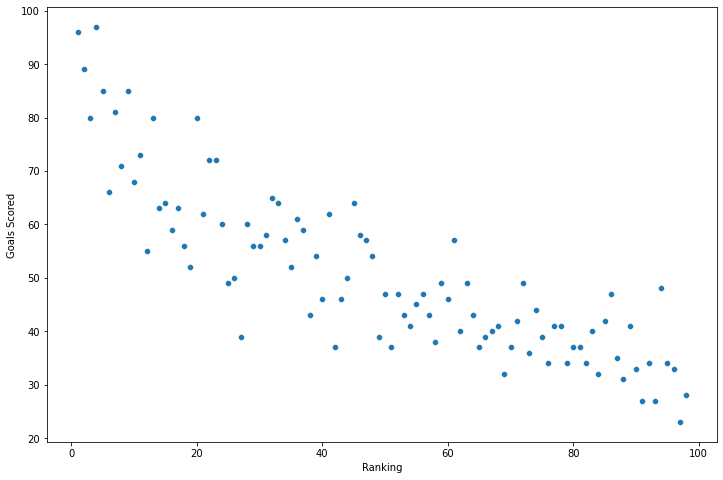

In [6]:
# Create a scatter plot with seaborn
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x='Rk', y='GF', data=df)
# Add labels and show plot
plt.xlabel('Ranking')
plt.ylabel('Goals Scored')
plt.show()

#- Exercise 3

Continue with the attached dataset and select three attributes. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.
In this case the 3 attributes that will be analyzed are the highest-scoring top goal scorer, match attendance and ranking position.

The null hypothesis is that the team with the highest-scoring top goal scorer and the most attendance not necesarily will have the best ranking position.

We will first extract the number of goals scored from the 'Top Team Scorer' column, then will compute the correlation between goals scored, attendance, and ranking position using the spearman method. Then, we will print the results of the test, including the correlation coefficient and the p-value, and decide if the null hypothesis is rejected or not.

In [7]:
# Extract the number of goals scored from the 'Top Team Scorer' column
df['goals'] = df['Top Team Scorer'].str.extract('(\d+)').astype(int)

# Compute the correlation between goals scored, attendance, and ranking position
corr_goals_attendance = df[['goals','Attendance','Rk']].corr()
print(corr_goals_attendance)

# Set the null and alternative hypotheses
ho = "There is no correlation between goals scored, attendance, and ranking position"
ha = "There is a correlation between goals scored, attendance, and ranking position"

# Perform a correlation test using the spearman method
coef, p = stats.spearmanr(df['goals'],df['Attendance'])

# Print the results of the test
print("Correlation coefficient: {:.3f}".format(coef))
print("p-value: {:.3f}".format(p))

# Set the alpha level
alpha = 0.05

# Decide if we reject or fail to reject the null hypothesis
if p < alpha:
    print("We reject the null hypothesis and accept the alternative hypothesis: ", ha)
else:
    print("We fail to reject the null hypothesis: ", ho)


               goals  Attendance        Rk
goals       1.000000    0.274552 -0.585295
Attendance  0.274552    1.000000 -0.542683
Rk         -0.585295   -0.542683  1.000000
Correlation coefficient: 0.256
p-value: 0.011
We reject the null hypothesis and accept the alternative hypothesis:  There is a correlation between goals scored, attendance, and ranking position


Finally, we will create a scatter plot to visualize the relationship between goals scored, attendance, and ranking position, where the color of the points represent the ranking position of the team.

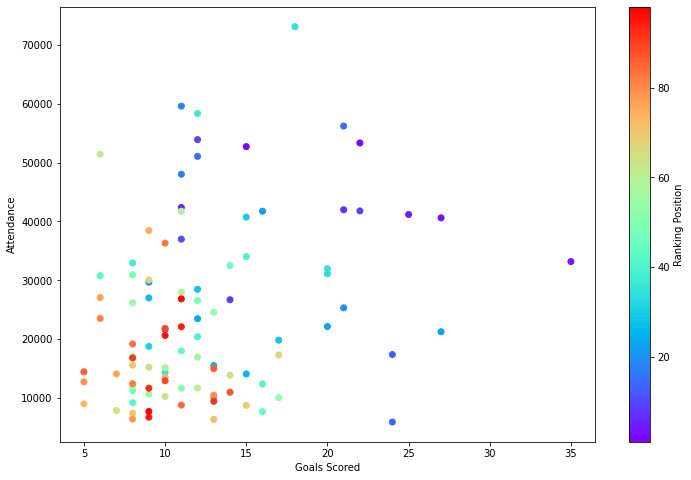

In [8]:
# Create a scatter plot to visualize the relationship between goals scored, attendance, and ranking position
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df['goals'], df['Attendance'], c=df['Rk'], cmap='rainbow')
plt.xlabel("Goals Scored")
plt.ylabel("Attendance")
plt.colorbar(label="Ranking Position")
plt.show()